**Importing all the Required libraries.**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Loading the dataset and naming the columns, since the dataset downloaded does not have any column names.**

In [70]:
# loading the dataset
adult = pd.read_csv('adult.data')

# adding the names of the columns
adult.columns = ['age', 'work_class', 'fnlwgt', 'education', 'education_number', 
                 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

**The dataset has the following attributes:**
 - __age__ : The age of the person (Integer).
 - __work_class__ : The sector the person is employed in (Categoical).
 - __fnlwgt__ : The final weight, this is the number of people the census believes the entry represents (Integer).
 - __education__ : Educational qualification of the employee (Categorical).
 - __education_number__ : A unique number assigned to each education level (Integer).
 - __marital_status__ : The marital status of the employee (Categorical).
 - __occupation__ : The occupation of the employee (Categorical).
 - __relationship__ : The relationship status of the employee (Categorical).
 - __race__ :The ethnicity of the employee (Categorical).
 - __sex__ : Gender of the employee (Binary)
 - __capital_gain__ : Capital gain of the employee other than the income (Integer).
 - __capital_loss__ : Loss from the investments (Integer).
 - __hours_per_week__ : The number of hours each employee works per week (Integer).
 - __native_country__ : The employee's country (Categorical).
 - __income__ : Whether the employee makes greater than 50K or less than 50K (Binary).

In [71]:
# printing the info of the Data Frame
print(adult.info())

# getting the first five rows of the Data Frame
adult.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32560 non-null  int64 
 1   work_class        32560 non-null  object
 2   fnlwgt            32560 non-null  int64 
 3   education         32560 non-null  object
 4   education_number  32560 non-null  int64 
 5   marital_status    32560 non-null  object
 6   occupation        32560 non-null  object
 7   relationship      32560 non-null  object
 8   race              32560 non-null  object
 9   sex               32560 non-null  object
 10  capital_gain      32560 non-null  int64 
 11  capital_loss      32560 non-null  int64 
 12  hours_per_week    32560 non-null  int64 
 13  native_country    32560 non-null  object
 14  income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,work_class,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Dropping the columns fnlwgt and education_number, as they do not offer us any insights on statistical analysis**

In [72]:
# dropping the columns
adult.drop(['fnlwgt', 'education_number'], axis = 1, inplace= True)

**By examining the dataset it is found that the missing values in the dataset are denoted by '?', instead of the standard NA 
value.**
**From the code snippet below we see that there are 4262 rows that contain '?'**
 - __work_clas__ : Has 1836 rows that contain "?".
 - __occupation__ : Has 1843 rows that contain "?".
 - __native_country__ : Has 583 rows that contain "?". 
 

In [73]:
# Calculating the missing value count
for column in adult.columns:
    missing_count = adult[column].apply(lambda x: str(x).strip() == '?').sum()
    print(f'Column: {column}, Missing Values: {missing_count}')

Column: age, Missing Values: 0
Column: work_class, Missing Values: 1836
Column: education, Missing Values: 0
Column: marital_status, Missing Values: 0
Column: occupation, Missing Values: 1843
Column: relationship, Missing Values: 0
Column: race, Missing Values: 0
Column: sex, Missing Values: 0
Column: capital_gain, Missing Values: 0
Column: capital_loss, Missing Values: 0
Column: hours_per_week, Missing Values: 0
Column: native_country, Missing Values: 583
Column: income, Missing Values: 0


**Removing all the rows that contains the character "?" in any of the rows.**

In [74]:
# Find rows containing '?' in any column
rows_with_missing_values = adult.apply(lambda row: any(str(val).strip() == '?' for val in row), axis=1)

# Remove the rows with missing values
adult = adult.drop(adult[rows_with_missing_values].index)

# after removing these rows we can notice that the length  of the rows dropped from 32560 to 30161
print(f"The length of the data frame after removing the rows with '?' is: {len(adult)}")

The length of the data frame after removing the rows with '?' is: 30161


**Limiting categorization for the education column in the dataframe:**
 - All education levels lower than 'High School Grad' are classified as **'Dropout'**.
 - Education levels other than 'High School Grad', 'Bachelors', 'Masters', and 'Doctorate' are collectively classified as **'Community College'**.

In [75]:
# Remove leading/trailing whitespace from 'education' column
adult['education'] = adult['education'].str.strip()

# Limit Categorization
adult['education'].replace('Preschool', 'Dropout', inplace = True)
adult['education'].replace('1st-4th', 'Dropout', inplace = True)
adult['education'].replace('5th-6th', 'Dropout', inplace = True)
adult['education'].replace('7th-8th', 'Dropout', inplace = True)
adult['education'].replace('9th', 'Dropout', inplace = True)
adult['education'].replace('10th', 'Dropout', inplace = True)
adult['education'].replace('11th', 'Dropout', inplace = True)
adult['education'].replace('12th', 'Dropout', inplace = True)
adult['education'].replace('7th-8th', 'Dropout', inplace = True)
adult['education'].replace('HS-grad', 'High_School_Grad', inplace = True)
adult['education'].replace('Some-college', 'Community_college', inplace = True)
adult['education'].replace('Assoc-acdm', 'Community_college', inplace = True)
adult['education'].replace('Assoc-voc', 'Community_college', inplace = True)
adult['education'].replace('Prof-school', 'Community_college', inplace = True)


**Limiting categorization for the marital_status column**
 - People with the marital status 'Married-AF-spouse' and 'Married-civ-spouse' are classified as **Married**.
 - People with the marital status 'Seperated' and 'Married-spouse-absent' are classified as **Divorced**.
 - People with the marital status 'Never-married' are classified as **Single**.

In [76]:
# Remove leading/trailing whitespace from 'marital_status' column
adult['marital_status'] = adult['marital_status'].str.strip()

# Limit Categorisation
adult['marital_status'].replace('Never-married', 'Single', inplace = True)
adult['marital_status'].replace('Married-AF-spouse', 'Married', inplace = True)
adult['marital_status'].replace('Married-civ-spouse', 'Married', inplace = True)
adult['marital_status'].replace('Separated', 'Divorced', inplace = True)
adult['marital_status'].replace('Married-spouse-absent', 'Divorced', inplace = True)

**How are the countries distibuted in terms of percentage, in the given DataFrame?** (Question 1: Numpy and Pandas)

In [77]:
'''
The United States represents the majority of entries in the dataset, accounting for 91%, followed by Mexico with a smaller 
portion of 2%.
Given that 91% of the entries in the dataset originate from the United States, we can confidently exclude all other countries,
as they constitute only a minor proportion of the data.
'''
# calculating the values counts
native = pd.DataFrame(adult['native_country'].value_counts())
# calculating the percentage of the most common country
common_country_percent = round((native.iloc[0, 0] / len(adult)) * 100)
# calculating the percentage of the second most common country
second_most_common = round((native.iloc[1, 0] / len(adult)) * 100)

print(f'The country which contains most entries is the United States at {common_country_percent}%,'
      f'which is followed by Mexico at {second_most_common}%.')


The country which contains most entries is the United States at 91%,which is followed by Mexico at 2%.


In [78]:
# Hence, we will retain only the data from the United States and drop all other countries from the dataset.
adult['native_country'] = adult['native_country'].str.strip()
index_country = adult[adult['native_country'] != 'United-States'].index
adult.drop(index_country,  inplace = True)

**what is the age distribution of the work force in the given dataset?** (Question 2: Numpy and Pandas)

In [79]:
'''
It is intriguing to observe that individuals continue working until the age of 90, surpassing the official retirement age in 
the United States, which is typically 65. To gain deeper insights, let us further investigate the factors that motivate people 
to work beyond the age of 65.
'''

avg_age, min_age, max_age = adult['age'].mean(), adult['age'].min(), adult['age'].max()
print(f'The average age of the workforce in the given dataset is: {round(avg_age)}\n'
      f'The minimum age of the workforce in the given dataset is: {round(min_age)}\n'
      f'The maximum age of the workforce in the given dataset is: {round(max_age)}')

The average age of the workforce in the given dataset is: 39
The minimum age of the workforce in the given dataset is: 17
The maximum age of the workforce in the given dataset is: 90


**Calculating the percentage distribution of people in each educational category within the age range of 65 to 90**    (Question 1: Functions)

In [80]:
'''
Based on the data from the provided DataFrame, a notable trend emerges among individuals who continue working after reaching 
the retirement age of 65. A significant majority of these individuals possess lower levels of education, namely those who have
either not completed their education, attended community college, or attained a high school diploma. In fact, approximately 
79% of the entire group falls within these categories.

On the other hand, individuals with higher education levels, including Bachelor's, Master's, or Doctorate degrees, 
constitute only a relatively small portion, making up approximately 22% of the total population working past the age of 65. 
This suggests that a considerable proportion of people who continue working beyond retirement may do so to address essential 
financial needs rather than for career advancement or higher-skilled roles.
'''

# Filtering out the people whose age is (>= 65) and (<= 90) using conditional statements
old_age = adult[(adult['age'] >= 65) & (adult['age'] <= 90)]
old_education = pd.DataFrame(old_age['education'].value_counts())

# calculating the percentage distribution of people in each educational category within the age range of 65 to 90, using the 
# lambda function.
old_education['percent_edu_in_%'] = old_education['education'].apply(lambda x: round((x / old_education['education'].sum()) * 100))
old_education

,education,percent_edu_in_%
High_School_Grad,294,32
Community_college,226,25
Dropout,196,22
Bachelors,117,13
Masters,51,6
Doctorate,24,3


**Visualising a bar chart from the old_education dataset to see the correlation** (Question 1: Matplotlib and seaborn)

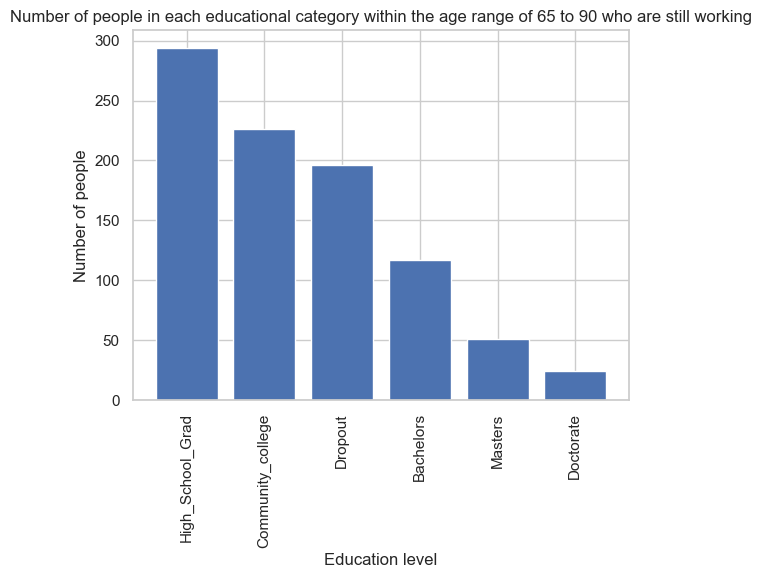

In [81]:
'''
Based on the bar chart, we can deduce a negative correlation between the education level of individuals and the number of 
people working beyond the age of 65. As education level increases, the probability of individuals working beyond 65 decreases 
significantly.
'''
# plotting the bar graph
plt.bar(old_education.index, old_education['education'])
plt.xticks(rotation = 90)
plt.xlabel('Education level')
plt.ylabel('Number of people')
plt.title('Number of people in each educational category within the age range of 65 to 90 who are still working');
plt.show()

**How age affects the income level, visualised using Piechart** (Question 2: Matplotlib and seaborn)

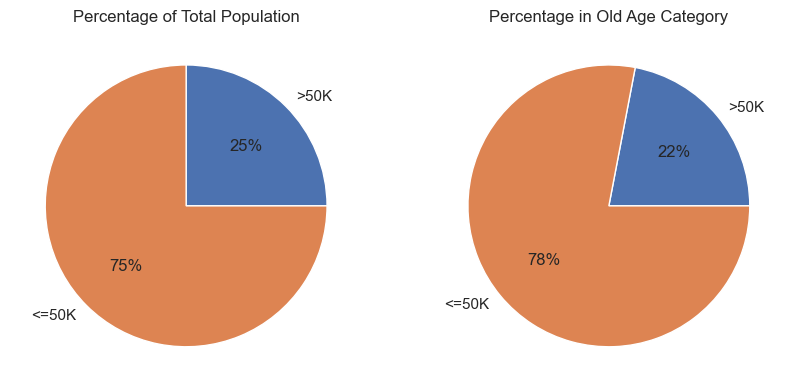

In [82]:
'''
The pie chart reveals an interesting trend: individuals who work past the retirement age are more likely to earn less than $50K
compared to the general population in the dataset. In the general population, 25% of people make over 50K, while in the age 
group of 65 - 90, the percentage drops to 22%, which is 3% lower. This difference could be attributed to the fact that
individuals working beyond 65 are likely to have lower educational levels, which may result in lower income levels.
'''
# getting the value counts of the data frame and for the old people
total = pd.DataFrame(adult['income'].value_counts())
old = pd.DataFrame(old_age['income'].value_counts())
# calculating the percent of people who makes more than 50K in each category
total_percent = round((total.iloc[1, 0] / len(adult)) * 100)
old_percent = round((old.iloc[1, 0] / old['income'].sum()) * 100)

# setting up the axes and figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Total population
axes[0].pie([total_percent, 100 - total_percent], labels=['>50K', '<=50K'], autopct='%1.0f%%')
axes[0].set_title('Percentage of Total Population')

# Old age category
axes[1].pie([old_percent, 100 - old_percent], labels=['>50K', '<=50K'], autopct='%1.0f%%')
axes[1].set_title('Percentage in Old Age Category')

plt.show()


**What is the average, minimum, and maximum time people work per week in the given dataset?** (Question 3: Numpy and Pandas)

In [83]:
'''
Currently, the average working hours in the United States is reported to be 39 hours per week. However, intriguingly, the 
average working hours obtained from the dataset show 41 hours per week, which is 2 hours higher. Moreover, the maximum 
recorded working hours in the dataset are 99 hours, which seems unusually high. To gain deeper insights, we should delve
further into the data to understand which demographic groups tend to overwork.
'''

# distribution of working hours in the dataset
agg_func = adult['hours_per_week'].agg(['mean', 'min', 'max']).round()
print(f'The distribution of working hours in the dataset:\n{agg_func}\n')

The distribution of working hours in the dataset:
mean    41.0
min      1.0
max     99.0
Name: hours_per_week, dtype: float64



**To gain a better understanding of the data, we can categorize the "hours per week" numerical column into bins and create a new column based on these bin values and visualise it with the help of histogram. This will allow us to analyze the data in a more meaningful way and identify patterns or trends related to working hours.** (Question 3: Matplotlib and Seaborn)
 - __0 - 25 hrs__: Low Working hours
 - __25 - 40 hrs__: Average working hours
 - __40 - 60 hrs__: High Working hours
 - __60 - 100 hrs__: Extremely high working hours

<Axes: xlabel='hours_per_week', ylabel='Count'>

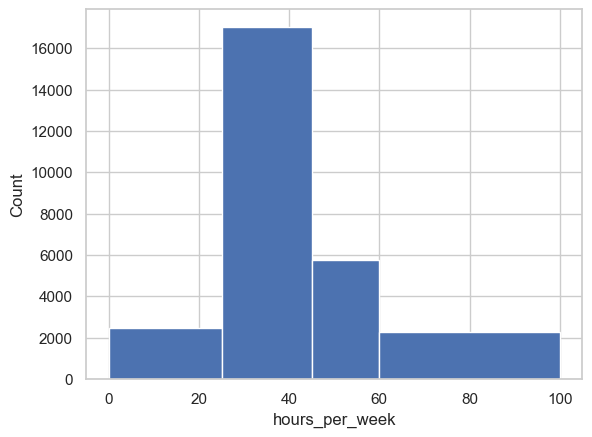

In [84]:
'''
The histogram provides valuable insights into the working hours distribution in the given dataset. The majority of individuals 
fall into the "Average working hours" category, represented by the interval of 25 to 45 hours per week. Following this, the 
next prominent group is the "High working hours" category, encompassing the range of 45 to 60 hours per week.
'''
# defining the bins
bins = [0, 25, 45, 60, 100]

# defining the labels for bins
labels = ['Low working hours', 'Average working hours', 'High working hours', 'Extremely high working hours']
adult['working_hours_category'] = pd.cut(adult['hours_per_week'], bins = bins, labels = labels)

# defining the background
sns.set(style="whitegrid")

# plotting the histogram
sns.histplot(adult['hours_per_week'], bins = bins, alpha = 1)

**What is the percentage distribution of people in each of the working hour categories?** (Question 2: Functions)

In [85]:
'''
As deduced from the histogram, a substantial proportion of employees (66%) in the dataset have average working hours. 
Following that, 20% have high working hours, 11% have low working hours, and 3% have extremely high working hours.
'''
# getting the value counts in each work category
working_hour_count = pd.DataFrame(adult['working_hours_category'].value_counts())

# using lambda function to calculate the percentage with respect to the total population
working_hour_count['people_in_each_category_%'] = working_hour_count['working_hours_category'].apply(lambda x: round((x / working_hour_count['working_hours_category'].sum()) * 100))
working_hour_count.rename(columns = {'working_hours_category' : 'Value_count'}, inplace = True)
working_hour_count

,Value_count,people_in_each_category_%
Average working hours,18147,66
High working hours,5391,20
Low working hours,3007,11
Extremely high working hours,958,3


**How does the distribution in the Average working hour group range?**(Question 4: Matplotlib and Seaborn)

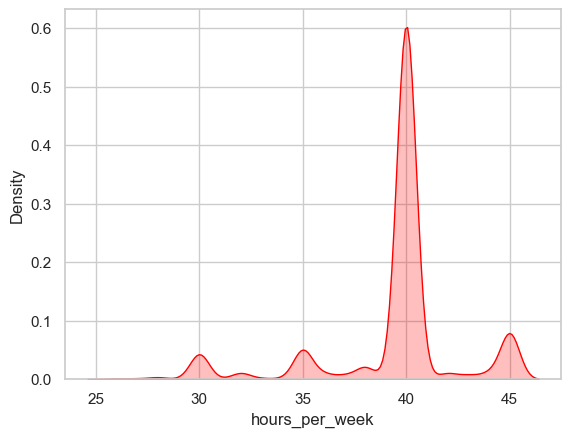

In [86]:
'''
The KDE plot is employed to visualize the distribution of data points within the "Average working hours" category. The plot 
highlights that a significant portion of individuals work approximately 40 hours per week, which aligns with the mean value.
Additionally, there are minor spikes in the plot observed around 30, 35, and 45 hours, indicating some clustering of data 
points at these hour intervals.
'''

# since we have the highest number of people in the bin range (25 - 45), visualising a kde plot for that range
high_working_hours = adult[adult['working_hours_category'] == 'Average working hours']
sns.kdeplot(high_working_hours['hours_per_week'], fill = True, color = 'Red');

**How does the education level of the employee correspond to their weekly working hours?** (Question 4: Numpy and Pandas)

In [87]:
'''
- The pivot table with 'education' as the index and 'working_hours_category' as columns, using the value counts as the 
  aggregate function, reveals interesting insights about the working hours of different education categories.
  
- The working hours trend shows that individuals with higher education tend to spend more time working, while those with lower
  education spend the least amount of time working.
  
- The categories 'Dropout', 'High School Grad' and 'Community College' have the lowest working hours, whereas 'Bachelors', 
'Masters', and 'Doctorate' categories show a gradual increase in working hours.
  
- Surprisingly, a significant proportion of people with a 'Doctorate' degree have high working hours, indicating that they
  might be more engaged in their professions or research work.
  
- People with a 'Doctorate' have the highest proportion (10%) of individuals in the 'Extremely high working hours' category,
  followed by 'Masters' degree holders at 5%.
  
- In contrast, for the categories 'Dropout', 'High School Grad', 'Community colege' and 'Bachelors', more than 70% of the 
people have either 'Average working hours' or below, suggesting a lower dedication to work in these categories.

In summary, the working hours distribution across different education categories highlights how educational attainment can
influence the time individuals spend on their jobs, with higher education generally associated with more working hours.

'''

# making the pivot table
adult_pivot = adult.pivot_table(index = 'education', columns = 'working_hours_category', aggfunc = 'size')

# converting the values into percentages
adult_pivot = adult_pivot.div(adult_pivot.sum(axis=1), axis=0) * 100
adult_pivot = adult_pivot.round()

# changing the order of the index
desired_order = ['Dropout', 'High_School_Grad','Community_college', 'Bachelors', 'Masters', 'Doctorate']
adult_pivot = adult_pivot.reindex(desired_order)
adult_pivot

working_hours_category,Low working hours,Average working hours,High working hours,Extremely high working hours
education,,,,
Dropout,23.0,63.0,11.0,3.0
High_School_Grad,8.0,72.0,17.0,3.0
Community_college,13.0,64.0,19.0,3.0
Bachelors,7.0,63.0,27.0,3.0
Masters,6.0,59.0,30.0,5.0
Doctorate,5.0,43.0,42.0,10.0


**How is the education qualification of an employee correlate with the hours of work per week?** (Question 5: Matplotlib and Seaborn)

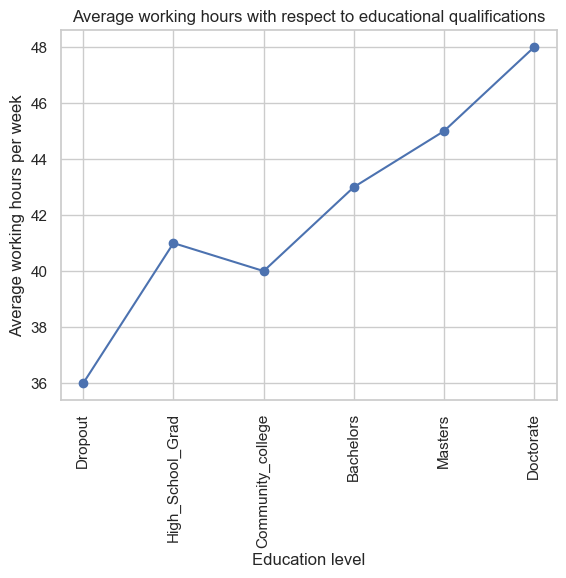

In [88]:
'''
The plot clearly indicates a direct relationship between an individual's educational qualification and the average amount of 
working time per week. As the level of education increases, the average working hours also tend to rise proportionally.Except,
for people who went to community college, which drops below the 'high school grad'. Overall, there appears to be a positive
correlation.
'''

# using the groupby function to filter out the data
work = pd.DataFrame(adult.groupby('education')['hours_per_week'].mean().round())
work = work.reindex(desired_order)

# plotting the work DataFrame
plt.plot(work, 'ob-')
plt.xlabel('Education level')
plt.ylabel('Average working hours per week')
plt.xticks(rotation = 90)
plt.title('Average working hours with respect to educational qualifications');

**What is the income distribution for poeple working in the category, Low working hours?** (Question 5: Numpy and Pandas)

In [89]:
'''
Analyzing the dataset reveals a notable trend: individuals working 'Low working hours' are more inclined to earn less than 50K.
In the overall dataset, the probability of making over 50K is 25%. However, for the 'Low working hours' category, this
probability drops significantly to 6%, indicating a substantial 19% decline.
'''
# stripping the white space
adult['working_hours_category'] = adult['working_hours_category'].str.strip()
# filtering the data containing low working hours
low_time = adult[adult['working_hours_category'] == 'Low working hours']
# getting the value counts
low_percent_income = pd.DataFrame(low_time['income'].value_counts())
# converting it in terms of percentage
low_percent_income = low_percent_income.div(low_percent_income['income'].sum()) * 100
low_percent_income = low_percent_income.round()
low_percent_income

,income
<=50K,94.0
>50K,6.0


**What is the income distribution for people working in the category, High Working hours?** (Question 6: Numpy and Pandas)

In [90]:
'''
Conversely, individuals working 'Extremely high working hours' are more prone to earning over 50K. The probability of this 
group making over 50K is 38%, representing a 13% increase compared to the general dataset's probability.
'''
# data filtering, extremely high working hours
high_time = adult[adult['working_hours_category'] == 'Extremely high working hours']
# calculating the value counts
high_percent_income = pd.DataFrame(high_time['income'].value_counts())
# calculating the percentage
high_percent_income = high_percent_income.div(high_percent_income['income'].sum()) * 100
high_percent_income = high_percent_income.round()
high_percent_income

,income
<=50K,62.0
>50K,38.0


**Is there a correlation between income and working hours, specifically within the categories of 'Low working hours' and 'Extremely high working hours'?** (Additional question 1: Using matplotlib)

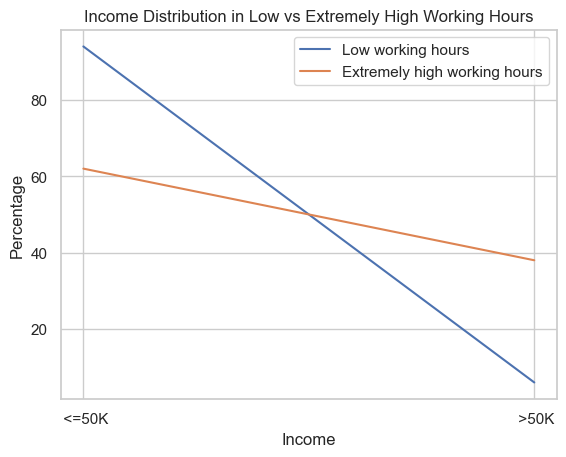

In [91]:
'''
The plotted data reveals a significant decline in the proportion of individuals earning above 50K within the 
'Low working hours' category, as opposed to the 'Extremely high working hours' category where the decline is less steep. 
This suggests that those with low working hours might have lower educational qualifications or could be engaged in part-time 
employment, which could contribute to their lower income.
'''

# Plotting
plt.plot(low_percent_income.index, low_percent_income['income'], label='Low working hours')
plt.plot(high_percent_income.index, high_percent_income['income'], label='Extremely high working hours')

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Income Distribution in Low vs Extremely High Working Hours')
plt.legend()

# Display the plot
plt.show()


**How is race associated with high-income group, people who make over 50K?** (Question 7: Numpy and Pandas)

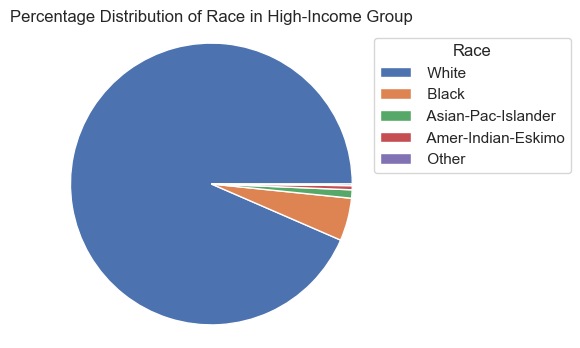

,race
White,93.0
Black,5.0
Asian-Pac-Islander,1.0
Amer-Indian-Eskimo,0.0
Other,0.0


In [92]:
'''
The analysis reveals that the majority of individuals in the dataset (approximately 93%) who earn more than $50,000 
per year are of White ethnicity. The Black race represents the second largest group, comprising around 5% of the 
high-income category. In contrast, the combined percentage of individuals from other racial backgrounds 
(Asian-Pac-Islander, Amer-Indian-Eskimo, and other groups) is only about 2% in the high-earning income category.
'''
# stripping the white space
adult['income'] = adult['income'].str.strip()
# filtering the values
high_income_race = adult[adult['income'] == '>50K']
high_income_race = high_income_race['race'].value_counts()
# calculating the percentage
high_income_race_percent = high_income_race.div(high_income_race.sum(axis = 0)) * 100

# plotting  the pie chart
plt.figure(figsize=(4, 4))
plt.pie(high_income_race_percent.values, autopct='')
plt.axis('equal')
plt.title('Percentage Distribution of Race in High-Income Group')
plt.legend(title='Race', labels=high_income_race.index, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

high_income_race_percent = pd.DataFrame(high_income_race_percent.round())
high_income_race_percent

**What is the percentage breakdown of people in each ethnicity with respect to their income level?** (Question 3: Function)

,race_high_income,race_total,percent
White,6539,24217,27.0
Black,343,2629,13.0
Asian-Pac-Islander,67,273,25.0
Amer-Indian-Eskimo,33,271,12.0
Other,13,113,12.0


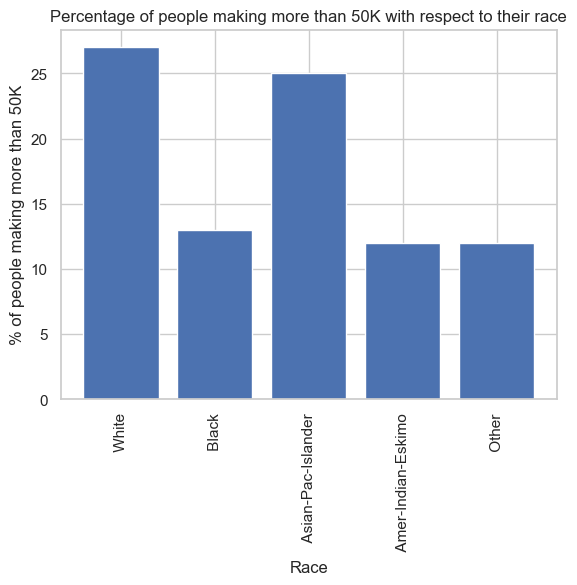

In [93]:
'''
Upon closer examination of the graph, it initially appeared that individuals of White ethnicity were financially better off 
compared to other ethnicities. However, after calculating the percentage of high-income earners relative to the total 
population size of each race, we find that the probability of making over $50,000 for people of White and Asian-Pacific 
Islander descent is 27% and 25% respectively. On the other hand, the other three ethnicities have similar probabilities around
12%.
In conclusion, individuals of White or Asian-Pacific Islander descent are approximately twice as likely to earn over $50,000 
compared to individuals of other races.
'''
# filtering the values
race_total = pd.DataFrame(adult['race'].value_counts())
# merging two data frames to get to calculate the percentage
joined_df = pd.DataFrame(high_income_race).join(race_total, how='outer', lsuffix='_high_income', rsuffix='_total')
# calculating the percentage
joined_df['percent'] = joined_df.apply(lambda row: row['race_high_income'] / row['race_total'] * 100, axis=1)
joined_df['percent'] = joined_df['percent'].round()

# plotting the bar chart
plt.bar(joined_df.index, joined_df['percent'])
plt.xticks(rotation = 90)
plt.xlabel('Race')
plt.ylabel('% of people making more than 50K')
plt.title('Percentage of people making more than 50K with respect to their race');

# displaying the data frame
pd.DataFrame(joined_df)
joined_df

**What is the total educational count with respect to gender?** (Additonal question 2: Using Seaborn)

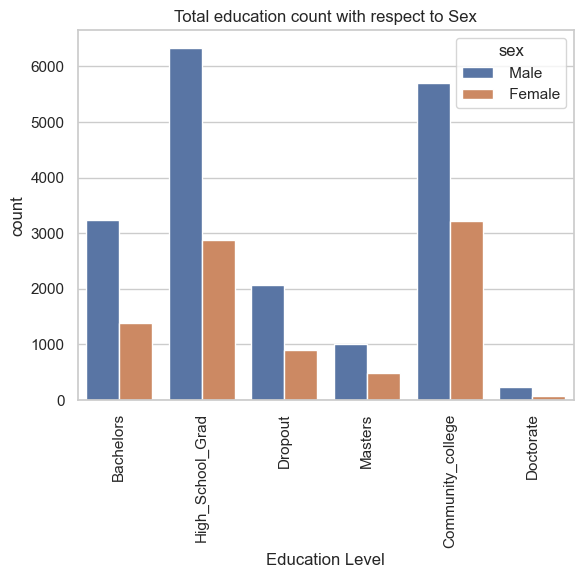

In [94]:
'''
The countplot with 'sex' as the hue reveals that there is a higher number of males in each educational category. 
However, to gain a comprehensive understanding, we need to ascertain the percentage of individuals within each educational 
level based on their respective genders.
'''
# plotting the countplot with sex as hue
sns.countplot(x = 'education', data = adult, hue = 'sex')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.title('Total education count with respect to Sex')
plt.show()

**Are both male and female equally educationally qualified?** (Question 4: Function)

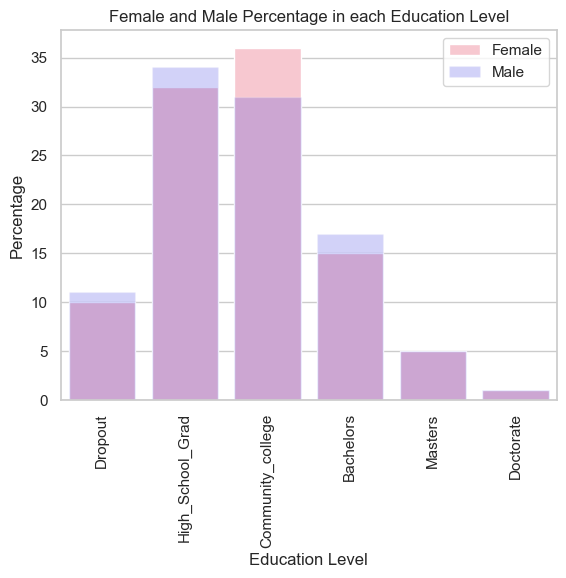

,education_female,education_male,female_percent,male_percent
Dropout,901,2058,10.0,11.0
High_School_Grad,2877,6332,32.0,34.0
Community_college,3222,5698,36.0,31.0
Bachelors,1376,3241,15.0,17.0
Masters,481,1003,5.0,5.0
Doctorate,75,239,1.0,1.0


In [95]:
'''
The analysis of both the data and the visualizations reveals that the percentage distribution of genders is comparable for the
'Masters' and 'Doctorate' categories, both accounting for 5% and 1% respectively. 

In the 'High School Grad' category, females comprise 32% of the total, while males make up 34%. Similarly, within the 
'Community College' category, females represent 36%, and males account for 31%. For individuals with a 'Bachelors' degree, 
the distribution is 15% for females and 17% for males. Consequently, it can be inferred that genders exhibit relatively similar
levels of educational attainment across most sectors.
'''
# getting the female educational counts
adult['sex'] = adult['sex'].str.strip()
female_edu = adult[adult['sex'] == 'Female']
female_edu = pd.DataFrame(female_edu['education'].value_counts())

# merging the two Data Frames
male_edu = adult[adult['sex'] == 'Male']
male_edu = pd.DataFrame(male_edu['education'].value_counts())
both_edu = female_edu.join(male_edu, how = 'outer', lsuffix = '_female', rsuffix= '_male')

# calculating the percentage using lambda function
both_edu['female_percent'] = both_edu['education_female'].apply(lambda x : x / both_edu['education_female'].sum()) * 100
both_edu['male_percent'] = both_edu['education_male'].apply(lambda x : x / both_edu['education_male'].sum()) * 100

# rounding off the values
both_edu = both_edu.round()
both_edu = both_edu.reindex(desired_order)
both_edu

# plootting the values in a barplot
ax = sns.barplot(x= both_edu.index, y='female_percent', data=both_edu, color='pink', label='Female')
ax = sns.barplot(x=both_edu.index, y='male_percent', data= both_edu, color='blue', alpha=0.2, label='Male')

# setting labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
plt.title('Female and Male Percentage in each Education Level')

# Show the legend
plt.legend()

# rotating the x-axis
plt.xticks(rotation= 90)

# Show the plot
plt.show()

both_edu

**Which gender earns more income?** (Question 8: Numpy and Pandas)

In [96]:
'''
This uncovers a surprising revelation – despite both genders having similar levels of education, males significantly outnumber 
females in the higher income bracket, surpassing them by a considerable margin. While 32% of men fall into the high-income 
category, only 11% of females achieve the same, signifying a substantial 21% disparity.
'''

# removing the white space
for column in adult.columns:
    if adult[column].dtype == 'O':  # Check if column dtype is object (string)
        adult[column] = adult[column].str.strip()
        
# filtering out the data
male_high_earners = adult[(adult['sex'] == 'Male') & (adult['income'] == '>50K')]
female_high_earners = adult[(adult['sex'] == 'Female') & (adult['income'] == '>50K')]

# calculating the percentages
percent_male = round((len(male_high_earners)/ len(adult[adult['sex'] == 'Male'])) *100)
percent_female = round((len(female_high_earners)/ len(adult[adult['sex'] == 'Female'])) *100)

print(f"The percentage of men who's in high income category is: {percent_male}%\n"
      f"Whereas the percentage of women who's in the high income category is: {percent_female}%")

The percentage of men who's in high income category is: 32%
Whereas the percentage of women who's in the high income category is: 11%


**What is the average time spent working per week by gender?** (Additional question 3: Using Seaborn)

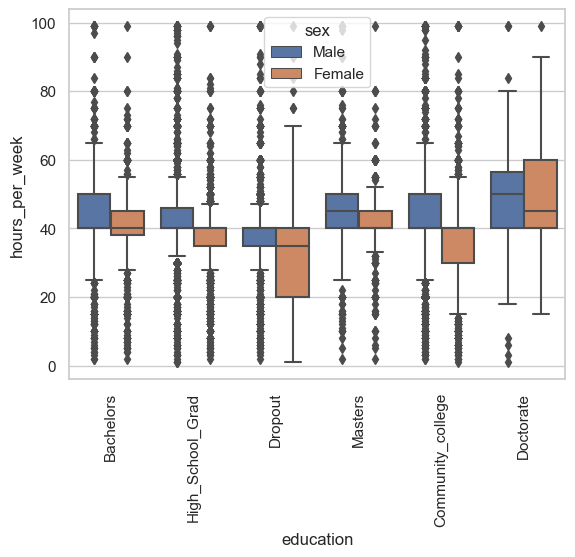

In [97]:
'''
This boxplot provides insight into the significant income disparity based on gender. The boxplot indicates that, despite 
having similar education levels, women tend to work fewer hours than men in all educational categories except for Doctorate. 
This discrepancy in working hours might contributes to the lower percentage of women in the high-income category compared to 
their male counterparts.
'''

# plotting the bo\xplot
sns.boxplot(data = adult, x = 'education', y = 'hours_per_week', hue = 'sex');
# rotating the x- axis 90 degrees, so that they don't overlap
plt.xticks(rotation = 90)
plt.show();

**How is educational qualification linked with the marital status?** (Question 9: Numpy and Pandas)

In [98]:
'''
The insights from the pivot table reveal distinct educational trends based on marital status. Individuals classified as 
"Married" are more inclined to have advanced degrees compared to those with other marital statuses. Conversely, people
categorized as "Divorced" or "Widowed" tend to have educational backgrounds comprising Dropout, High School Grad, or 
Community College levels. Furthermore, individuals in the "Married" or "Single" marital statuses exhibit a greater likelihood 
of pursuing higher degrees compared to those in the "Divorced" or "Widowed" categories.
'''
# creating the pivot table
pivot_marital_status = adult.pivot_table(index = 'education', columns = 'marital_status', aggfunc= 'size')
# rearranging the index values
pivot_marital_status = pivot_marital_status.reindex(desired_order)
# calculating the percentage
pivot_marital_status_percent = pivot_marital_status.div(pivot_marital_status.sum(axis=0), axis=1) * 100
# rounding off the values
pivot_marital_status_percent = pivot_marital_status_percent.round()
pivot_marital_status_percent

marital_status,Divorced,Married,Single,Widowed
education,,,,
Dropout,10.0,9.0,13.0,19.0
High_School_Grad,37.0,34.0,30.0,43.0
Community_college,35.0,30.0,34.0,25.0
Bachelors,12.0,19.0,18.0,8.0
Masters,5.0,7.0,4.0,4.0
Doctorate,1.0,2.0,1.0,1.0


**Does the marital status have any influence on the income?** (Question 10: Numpy and Pandas)

In [99]:
'''
Examining the pivot table, it's apparent that individuals classified as "Married" or "Single" tend to achieve higher 
educational qualifications. Notably, the largest group making over 50K (47%) falls under the "Married" marital status, 
followed by "Divorced" and "Widowed" categories, each comprising around 10% of high earners. A noteworthy observation is that 
despite the similar educational attainment of "Married" and "Single" individuals, the proportion of "Single" individuals making
over 50K is significantly lower compared to other marital status groups.
'''
# making the pivot table
pivot_marriage_income = adult.pivot_table(index = 'income', columns = 'marital_status', aggfunc= 'size')
# calculating the percentage 
pivot_marriage_income_percent = pivot_marriage_income.div(pivot_marriage_income.sum(axis=0), axis=1) * 100
pivot_marriage_income_percent = pivot_marriage_income_percent.round()
pivot_marriage_income_percent

marital_status,Divorced,Married,Single,Widowed
income,,,,
<=50K,90.0,53.0,95.0,91.0
>50K,10.0,47.0,5.0,9.0


**Is there a correlation between a person's age and the number of hours they work per week?** (Additional question 4: Using Seaborn)

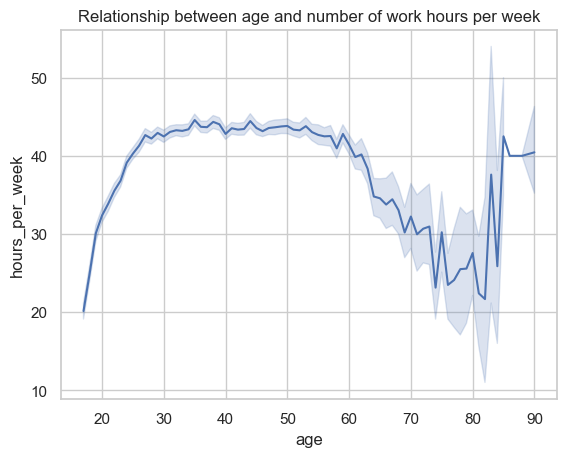

In [100]:
'''
The line plot illustrates that with increasing age, the weekly working hours of employees generally rise. This trend remains 
relatively stable between the ages of 30 and 60. After reaching around 50 years of age, there is a significant decline in 
working hours, likely due to retirement, with an average of slightly over 20 hours per week. Interestingly, there is a 
notable surge in working hours for individuals aged approximately 84 to 90 years.
'''
# plotting the line plot
sns.lineplot(data = adult, x = 'age', y = 'hours_per_week')
# title for the line plot
plt.title('Relationship between age and number of work hours per week')
plt.show()

**Is the capital gain and capital loss related to income in some way?** (Question 5: Function)

In [116]:
'''
Based on the net income column, it is evident that approximately 59% of individuals are earning more than $50,000. This 
observation aligns with common sense, as individuals typically aim to surpass the minimum income threshold necessary for 
basic living expenses, allowing them to allocate funds towards investments. This rationale may explain why a majority (59%) 
of individuals in the dataset earn over $50,000, likely reflecting their intention to invest.
'''

def add_capital(row):
    '''
    The function adds both the capital gain and capital loss for each row.
    Parameters:
        row : Each row in the data frame.
    Return:
        row['capital_gain'] + row['capital_loss'] (int): The value sum that'll be added
            to the new column, net_income.
    '''
    return row['capital_gain'] - row['capital_loss']

# function call
adult['net_income'] = adult.apply(add_capital, axis=1)
adult['net_income'].value_counts()

# filter if net income is not equal to zero
df_investments = adult[adult['net_income'] != 0]
df_investments = pd.DataFrame(df_investments['income'].value_counts())
# calculate the percentage
df_investments = df_investments.div(df_investments['income'].sum()) * 100
df_investments = df_investments.round()
df_investments

,income
>50K,59.0
<=50K,41.0


**Can you derive any insights from the column work_class using pivot table?** (Additional question 5: Using Pandas)

In [131]:
'''
The  following insights can be drawn from the pivot table:
1.Across both genders (Male and Female), a substantial proportion of individuals (approximately 70%) in the Dropout, High 
School Grad, and Bachelors educational categories are employed in the private sector. However, for individuals with Masters 
and Doctorate degrees, this percentage drops to less than 50% for both genders.
2.The data table also reveals that women are more inclined to work for local government institutions, in contrast to their male
counterparts. Conversely, men are more prone to being self-employed compared to women.
'''
# creating the pivot table
class_pivot = adult.pivot_table(index = 'work_class', columns = ['sex', 'education'], aggfunc= 'size')
# calculating the percentage
class_pivot_table = class_pivot.div(class_pivot.sum(axis=0), axis=1) * 100
class_pivot_table = class_pivot_table.round()
class_pivot_table

sex                 Female                                      \
education        Bachelors Community_college Doctorate Dropout   
work_class                                                       
Federal-gov            4.0               4.0       9.0     1.0   
Local-gov             15.0               6.0      17.0     4.0   
Private               69.0              79.0      36.0    88.0   
Self-emp-inc           2.0               1.0       3.0     1.0   
Self-emp-not-inc       4.0               4.0      11.0     4.0   
State-gov              6.0               6.0      24.0     2.0   
Without-pay            NaN               0.0       NaN     0.0   

sex                                            Male                    \
education        High_School_Grad Masters Bachelors Community_college   
work_class                                                              
Federal-gov                   3.0     3.0       4.0               4.0   
Local-gov                     6.0    33.0       7.0               6.0   
Private                      83.0    46.0      68.0              69.0   
Self-emp-inc                  1.0     2.0       7.0               5.0   
Self-emp-not-inc              3.0     5.0       9.0              11.0   
State-gov                     4.0    11.0       5.0               4.0   
Without-pay                   0.0     NaN       NaN               0.0   

sex                                                          
education        Doctorate Dropout High_School_Grad Masters  
work_class                                                   
Federal-gov            2.0     1.0              3.0     4.0  
Local-gov              4.0     5.0              5.0    17.0  
Private               46.0    80.0             75.0    55.0  
Self-emp-inc          12.0     2.0              4.0     6.0  
Self-emp-not-inc      15.0    11.0             11.0     9.0  
State-gov             21.0     2.0              2.0    10.0  
Without-pay            NaN     NaN              0.0     NaN